In [151]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit
from parameters.parameters import SOURCE_FOLDER, FIG_FOLDER

In [128]:
data_path = os.path.join(SOURCE_FOLDER, "elo_matrix_ProspecTonk.xlsx")
df_elo = pd.read_excel(data_path)
df_elo.date = pd.to_datetime(df_elo.date)
df_elo = df_elo.set_index("date")
df_elo

nem   yak   ner   yoh   nen   wot   pac  las   anu   ola  ...  \
date                                                                   ...   
2016-10-25  1024  1009  1018   984   991  1010   991  982   991  1000  ...   
2016-10-26  1032  1009  1018  1003   991  1010   982  964   991   999  ...   
2016-10-27  1032  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-28  1041  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-29  1063  1009  1018  1011   991  1010   975  941   984  1008  ...   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
2020-10-21   938  1243   961   840  1018  1234  1379  713  1117  1287  ...   
2020-10-22   970  1243   962   840  1018  1234  1347  716  1105  1296  ...   
2020-10-23   971  1243   970   840  1018  1234  1347  735  1105  1296  ...   
2020-10-24   971  1243   981   840  1018  1234  1352  731  1105  1291  ...   
2020-10-25   974  1243   992   840  1018  1234  1357  724  1105  1296  ...   

             olg   jea   pat   bar   ces   lad   ber   dor   eri   fic  
date                                                                    
2016-10-25  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-26  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-27  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-28  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-29  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020-10-21   933   760   841  1083   837   753   743   766   702   579  
2020-10-22   935   755   841  1070   832   753   743   795   702   566  
2020-10-23   920   751   841  1072   838   753   758   773   668   566  
2020-10-24   923   750   841  1062   822   753   758   781   666   580  
2020-10-25   908   740   841  1062   807   753   763   787   675   575  

[1462 rows x 27 columns]

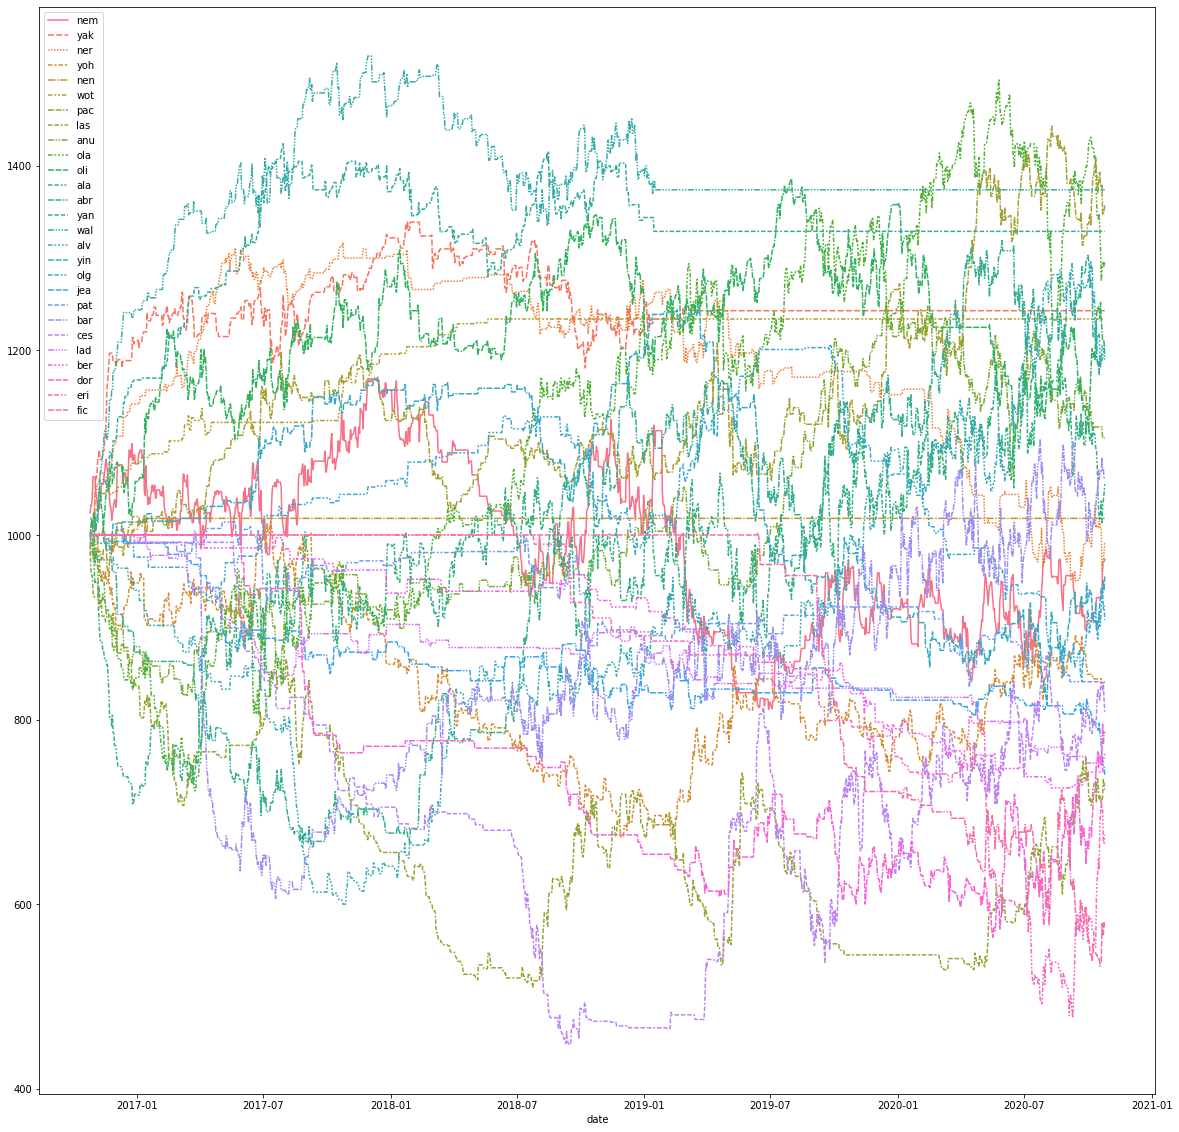

In [129]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(data=df_elo, ax=ax)
ax.legend()
plt.show()

In [130]:
data_path = os.path.join(SOURCE_FOLDER, "data_B.xlsx")
df = pd.read_excel(data_path, 
                   usecols=("monkey", "date", "choice", "stim_left_p", "stim_left_x0", "stim_right_p", 
                            "stim_right_x0", "time_response", 
                            "left_X", "left_Y", "right_X", "right_Y"
                           ))
df

monkey            date  choice  stim_left_p  stim_left_x0  \
0         Ola  2020-06-25None       0         0.75             2   
1         Ola  2020-06-25None       0         0.50             3   
2         Ola  2020-06-25None       0         0.75             2   
3         Ola  2020-06-25None       0         0.25            -2   
4         Ola  2020-06-25None       0         0.75            -1   
...       ...             ...     ...          ...           ...   
146420    Alv  2020-10-25None       0         0.25            -2   
146421    Alv  2020-10-25None       0         1.00            -2   
146422    Alv  2020-10-25None       1         0.25             3   
146423    Alv  2020-10-25None       0         1.00             1   
146424    Alv  2020-10-25None       1         1.00             3   

        stim_right_p  stim_right_x0  time_response  left_X  left_Y  right_X  \
0               0.75              3            528  1195.0   131.0   1195.0   
1               0.25              3            506  1195.0   131.0   1195.0   
2               0.75             -2            394   469.0   131.0    469.0   
3               0.25             -3            396   469.0   131.0    469.0   
4               0.75             -3            329   469.0   131.0    469.0   
...              ...            ...            ...     ...     ...      ...   
146420          1.00             -1           1074  1195.0   131.0   1195.0   
146421          1.00             -3           1995   469.0   131.0    469.0   
146422          0.75              2            843  1195.0   131.0   1195.0   
146423          0.25              1            703   469.0   131.0    469.0   
146424          0.50              3            683   469.0   131.0    469.0   

        right_Y  
0         517.0  
1         517.0  
2         517.0  
3         517.0  
4         517.0  
...         ...  
146420    517.0  
146421    517.0  
146422    517.0  
146423    517.0  
146424    517.0  

[146425 rows x 12 columns]

In [131]:
df.dropna(axis=0, inplace=True)
df

monkey            date  choice  stim_left_p  stim_left_x0  \
0         Ola  2020-06-25None       0         0.75             2   
1         Ola  2020-06-25None       0         0.50             3   
2         Ola  2020-06-25None       0         0.75             2   
3         Ola  2020-06-25None       0         0.25            -2   
4         Ola  2020-06-25None       0         0.75            -1   
...       ...             ...     ...          ...           ...   
146420    Alv  2020-10-25None       0         0.25            -2   
146421    Alv  2020-10-25None       0         1.00            -2   
146422    Alv  2020-10-25None       1         0.25             3   
146423    Alv  2020-10-25None       0         1.00             1   
146424    Alv  2020-10-25None       1         1.00             3   

        stim_right_p  stim_right_x0  time_response  left_X  left_Y  right_X  \
0               0.75              3            528  1195.0   131.0   1195.0   
1               0.25              3            506  1195.0   131.0   1195.0   
2               0.75             -2            394   469.0   131.0    469.0   
3               0.25             -3            396   469.0   131.0    469.0   
4               0.75             -3            329   469.0   131.0    469.0   
...              ...            ...            ...     ...     ...      ...   
146420          1.00             -1           1074  1195.0   131.0   1195.0   
146421          1.00             -3           1995   469.0   131.0    469.0   
146422          0.75              2            843  1195.0   131.0   1195.0   
146423          0.25              1            703   469.0   131.0    469.0   
146424          0.50              3            683   469.0   131.0    469.0   

        right_Y  
0         517.0  
1         517.0  
2         517.0  
3         517.0  
4         517.0  
...         ...  
146420    517.0  
146421    517.0  
146422    517.0  
146423    517.0  
146424    517.0  

[137297 rows x 12 columns]

In [132]:
monkeys = df.monkey.unique()
print(monkeys)

['Ola' 'Abr' 'Nem' 'Alv' 'Ner' 'Ala' 'Bar' 'Ces' 'Oli' 'Pac' 'Dor' 'Anu'
 'Yoh' 'Las' 'Yin']


In [133]:
df.date = df.date.apply(lambda element: element.replace("None", ""))
df.date = pd.to_datetime(df.date)
# df = df.set_index("date")

In [134]:
df

monkey       date  choice  stim_left_p  stim_left_x0  stim_right_p  \
0         Ola 2020-06-25       0         0.75             2          0.75   
1         Ola 2020-06-25       0         0.50             3          0.25   
2         Ola 2020-06-25       0         0.75             2          0.75   
3         Ola 2020-06-25       0         0.25            -2          0.25   
4         Ola 2020-06-25       0         0.75            -1          0.75   
...       ...        ...     ...          ...           ...           ...   
146420    Alv 2020-10-25       0         0.25            -2          1.00   
146421    Alv 2020-10-25       0         1.00            -2          1.00   
146422    Alv 2020-10-25       1         0.25             3          0.75   
146423    Alv 2020-10-25       0         1.00             1          0.25   
146424    Alv 2020-10-25       1         1.00             3          0.50   

        stim_right_x0  time_response  left_X  left_Y  right_X  right_Y  
0                   3            528  1195.0   131.0   1195.0    517.0  
1                   3            506  1195.0   131.0   1195.0    517.0  
2                  -2            394   469.0   131.0    469.0    517.0  
3                  -3            396   469.0   131.0    469.0    517.0  
4                  -3            329   469.0   131.0    469.0    517.0  
...               ...            ...     ...     ...      ...      ...  
146420             -1           1074  1195.0   131.0   1195.0    517.0  
146421             -3           1995   469.0   131.0    469.0    517.0  
146422              2            843  1195.0   131.0   1195.0    517.0  
146423              1            703   469.0   131.0    469.0    517.0  
146424              3            683   469.0   131.0    469.0    517.0  

[137297 rows x 12 columns]

In [135]:
new = {"choice": "c"}
for (var, new_var) in (("p", "p"), ("x0", "x")):
    for (side, new_side) in (("left", "0"), ("right", "1")):
        new.update({f'stim_{side}_{var}': f'{new_var}{new_side}'})
df.rename(columns=new, inplace=True)
df

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
0         Ola 2020-06-25  0  0.75   2  0.75   3            528  1195.0   
1         Ola 2020-06-25  0  0.50   3  0.25   3            506  1195.0   
2         Ola 2020-06-25  0  0.75   2  0.75  -2            394   469.0   
3         Ola 2020-06-25  0  0.25  -2  0.25  -3            396   469.0   
4         Ola 2020-06-25  0  0.75  -1  0.75  -3            329   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
146420    Alv 2020-10-25  0  0.25  -2  1.00  -1           1074  1195.0   
146421    Alv 2020-10-25  0  1.00  -2  1.00  -3           1995   469.0   
146422    Alv 2020-10-25  1  0.25   3  0.75   2            843  1195.0   
146423    Alv 2020-10-25  0  1.00   1  0.25   1            703   469.0   
146424    Alv 2020-10-25  1  1.00   3  0.50   3            683   469.0   

        left_Y  right_X  right_Y  
0        131.0   1195.0    517.0  
1        131.0   1195.0    517.0  
2        131.0    469.0    517.0  
3        131.0    469.0    517.0  
4        131.0    469.0    517.0  
...        ...      ...      ...  
146420   131.0   1195.0    517.0  
146421   131.0    469.0    517.0  
146422   131.0   1195.0    517.0  
146423   131.0    469.0    517.0  
146424   131.0    469.0    517.0  

[137297 rows x 12 columns]

In [136]:
lottery_types = {}

new_cols = (
    "is_gain", "is_loss", "is_gain_vs_loss", 
    "is_risky_left", "is_risky_right", 
    "is_same_p", "is_same_x", 
    "is_best_left", "is_best_right",
    "pair_id",
    "is_control", "is_risky", "is_neither_risky_nor_control",
    "is_reversed",
    "choose_risky", "choose_best")
new_content = {k: [] for k in new_cols}

for i, e in tqdm(df.iterrows(), file=sys.stdout, total=len(df)):
    e.is_gain = e.x0 >= 0 and e.x1 >= 0
    e.is_loss = e.x0 <= 0 and e.x1 <= 0
    e.is_gain_vs_loss = not (e.is_gain or e.is_loss)

    e.is_risky_left = not e.is_gain_vs_loss and \
        np.abs(e.x0) > np.abs(e.x1) and e.p0 < e.p1
    e.is_risky_right = not e.is_gain_vs_loss and \
        np.abs(e.x0) < np.abs(e.x1) and e.p0 > e.p1

    e.is_risky = e.is_risky_left or e.is_risky_right

    e.is_same_p = e.p0 == e.p1
    e.is_same_x = e.x0 == e.x1
    e.is_best_left = \
        (e.x0 > e.x1 and e.is_same_p) \
        or (e.p0 > e.p1 and e.is_same_x and e.is_gain) \
        or (e.p0 < e.p1 and e.is_same_x and e.is_loss) \
        or (e.is_gain_vs_loss)
    e.is_best_right = \
        not e.is_risky and not e.is_best_left

    e.is_control = e.is_best_left or e.is_best_right

    e.is_neither_risky_nor_control = not (e.is_control or e.is_risky)
    
    if not e.is_neither_risky_nor_control:

        if (e.is_risky and e.is_risky_left) or (e.is_control and e.is_best_left):
            pair = (e.p0, e.x0, e.p1, e.x1)
            e.is_reversed = False
        else:
            pair = (e.p1, e.x1, e.p0, e.x0)
            e.is_reversed = True
        try:
            e.pair_id = lottery_types[pair]
        except KeyError:
            e.pair_id = len(lottery_types)
            lottery_types[pair] = e.pair_id
        
        e.choose_best = (e.is_best_left and e.c == 0) or (e.is_best_right and e.c == 1)
        e.choose_risky = (e.is_risky_left and e.c == 0) or (e.is_risky_right and e.c == 1)
        
    else:
        e.pair_id = -1
        e.is_reversed = False
        e.choose_best = False
        e.choose_risky = False

    for k in new_cols:
        v = getattr(e, k)
        new_content[k].append(v)

for k in new_cols:
    df[k] = new_content[k]

100%|██████████| 137297/137297 [00:45<00:00, 3031.68it/s]


In [137]:
for k in new_cols:
    df[k] = new_content[k]
df

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
0         Ola 2020-06-25  0  0.75   2  0.75   3            528  1195.0   
1         Ola 2020-06-25  0  0.50   3  0.25   3            506  1195.0   
2         Ola 2020-06-25  0  0.75   2  0.75  -2            394   469.0   
3         Ola 2020-06-25  0  0.25  -2  0.25  -3            396   469.0   
4         Ola 2020-06-25  0  0.75  -1  0.75  -3            329   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
146420    Alv 2020-10-25  0  0.25  -2  1.00  -1           1074  1195.0   
146421    Alv 2020-10-25  0  1.00  -2  1.00  -3           1995   469.0   
146422    Alv 2020-10-25  1  0.25   3  0.75   2            843  1195.0   
146423    Alv 2020-10-25  0  1.00   1  0.25   1            703   469.0   
146424    Alv 2020-10-25  1  1.00   3  0.50   3            683   469.0   

        left_Y  ...  is_same_x  is_best_left  is_best_right  pair_id  \
0        131.0  ...      False         False           True        0   
1        131.0  ...       True          True          False        1   
2        131.0  ...      False          True          False        2   
3        131.0  ...      False          True          False        3   
4        131.0  ...      False          True          False        4   
...        ...  ...        ...           ...            ...      ...   
146420   131.0  ...      False         False          False       83   
146421   131.0  ...      False          True          False       30   
146422   131.0  ...      False         False          False        9   
146423   131.0  ...       True          True          False       17   
146424   131.0  ...       True          True          False       26   

        is_control  is_risky  is_neither_risky_nor_control  is_reversed  \
0             True     False                         False         True   
1             True     False                         False        False   
2             True     False                         False        False   
3             True     False                         False        False   
4             True     False                         False        False   
...            ...       ...                           ...          ...   
146420       False      True                         False        False   
146421        True     False                         False        False   
146422       False      True                         False        False   
146423        True     False                         False        False   
146424        True     False                         False        False   

        choose_risky  choose_best  
0              False        False  
1              False         True  
2              False         True  
3              False         True  
4              False         True  
...              ...          ...  
146420          True        False  
146421         False         True  
146422         False        False  
146423         False         True  
146424         False        False  

[137297 rows x 28 columns]

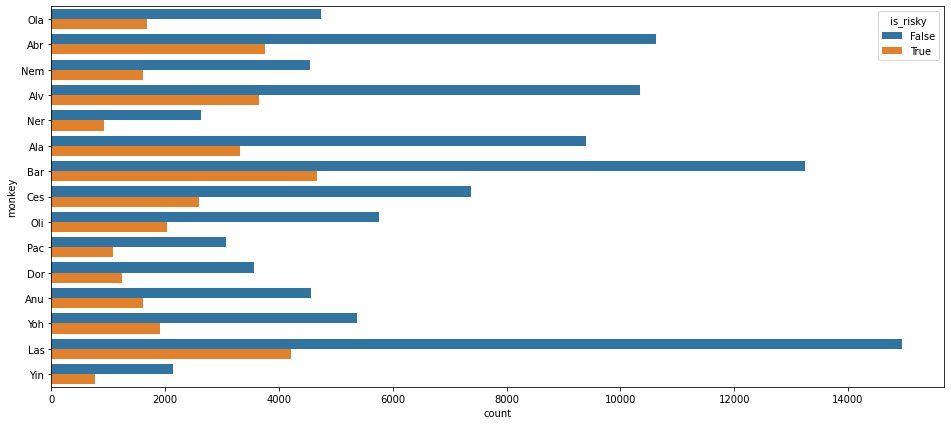

In [139]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(y="monkey", hue="is_risky", data=df, ax=ax)
plt.show()

In [144]:
EPS = np.finfo(float).eps

def objective(param, model, data):
    # Since we will look for the minimum, 
    # let's return -LLS instead of LLS

    inst = model(param=param)

    n = len(data)
    ll = np.zeros(n)

    for i, (_, row) in enumerate(data.iterrows()):
        pi = inst.p_choice(**row)
        ll[i] = np.log(pi + EPS)

    return -ll.sum()

def optimize(model, data):

    # Define an init guess
    init_guess = [(b[1] - b[0])/2 for b in model.fit_bounds]

    # Run the optimizer
    res = scipy.optimize.minimize(
        fun=objective,
        x0=init_guess,
        bounds=model.fit_bounds,
        args=(model, data))

    # Make sure that the optimizer ended up with success
    assert res.success

    # Get the best param and best value from the 
    best_param = res.x
    best_value = res.fun

    return best_param, best_value

In [152]:
class Model:
    
    param_labels = ['distortion', 'precision', 'risk_aversion']
    fit_bounds = [(0.2, 1.8), (0.1, 10.0), (-0.99, 0.99)]

    def __init__(self, param):
        self.distortion, self.precision, self.risk_aversion = param
    
    def p_choice(self, p0, x0, p1, x1, c, *args, **kwargs):

        p = self.p(p0=p0, x0=x0, p1=p1, x1=x1)
        return p[c]

    @classmethod
    def softmax(cls, v, precision):
        return expit(v/precision)

    @staticmethod
    def u(x, risk_aversion):
        if isinstance(x, np.ndarray):
            raise Exception
        else:
            if x >= 0:
                return x ** (1-risk_aversion)
            else:
                return - np.abs(x) ** (1 + risk_aversion)
    
    @classmethod
    def pi(cls, p, alpha):
        if isinstance(p, np.ndarray):
            to_return = np.zeros(p.shape)
            unq_zero = p != 0
            to_return[unq_zero] = np.exp(-(-np.log(p)) ** alpha)
            return to_return
        else:
            if p == 0:
                return 0
            else:
                return np.exp(-(-np.log(p)) ** alpha)

    def p(self, p0, x0, p1, x1):

        v0 = self.pi(p0, self.distortion) * self.u(x0, self.risk_aversion)
        v1 = self.pi(p1, self.distortion) * self.u(x1, self.risk_aversion)
        p = np.zeros(2)
        p[0] = self.softmax(v0-v1, self.precision)
        p[1] = 1 - p[0]
        return p

In [218]:
m = "Bar"
df_m = df[df.monkey == m]
df_m = df_m[(df_m.is_risky == True) & (df_m.is_gain == True)]
nunique = df_m.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_m.drop(cols_to_drop, axis=1, inplace=True)
df_m

date  c    p0  x0    p1  x1  time_response  left_X  right_X  \
651    2020-06-25  1  0.25   3  0.75   1            666  1195.0   1195.0   
661    2020-06-25  1  0.25   3  0.50   2            655  1195.0   1195.0   
676    2020-06-25  1  1.00   1  0.75   3            845  1195.0   1195.0   
706    2020-06-25  1  0.50   3  0.75   2           1374   469.0    469.0   
731    2020-06-25  1  0.75   1  0.50   2           1094   469.0    469.0   
...           ... ..   ...  ..   ...  ..            ...     ...      ...   
146142 2020-10-25  1  1.00   1  0.50   2            584   469.0    469.0   
146163 2020-10-25  1  1.00   1  0.25   2            635   469.0    469.0   
146173 2020-10-25  0  0.50   3  0.75   1            701   469.0    469.0   
146180 2020-10-25  1  0.25   3  0.50   1            577  1195.0   1195.0   
146201 2020-10-25  0  0.50   3  0.75   1            624   469.0    469.0   

        is_risky_left  is_risky_right  pair_id  is_reversed  choose_risky  
651              True           False       88        False         False  
661              True           False       43        False         False  
676             False            True       15         True          True  
706              True           False       81        False         False  
731             False            True       12         True          True  
...               ...             ...      ...          ...           ...  
146142          False            True       29         True          True  
146163          False            True       99         True          True  
146173           True           False       23        False          True  
146180           True           False       95        False         False  
146201           True           False       23        False          True  

[2335 rows x 14 columns]

In [219]:
best_param, best_value = optimize(model=Model, data=df_m)
print("best_param", best_param)

best_param [ 0.72158801  0.72756233 -0.20691704]


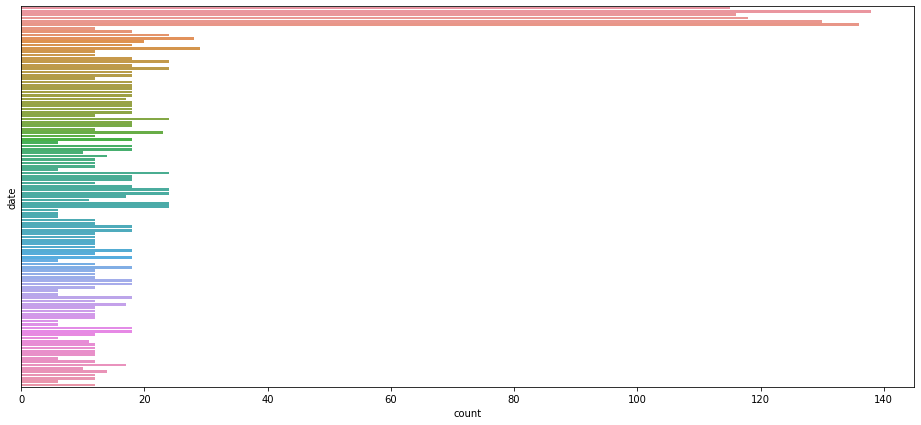

In [220]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(y="date", data=df_m, ax=ax)
ax.set_yticks([])
plt.show()

In [222]:
dates = df_m.date.unique()
n_days = len(dates)
n_param = len(Model.param_labels)

r = np.zeros((n_days, n_param))
for i in tqdm(range(n_days), file=sys.stdout):
    best_param, best_value = optimize(model=Model, data=df_m[df_m.date == dates[i]])
    r[i] = best_param

100%|██████████| 113/113 [00:42<00:00,  2.63it/s]


In [223]:
df_p = pd.DataFrame(r, index=dates, columns=Model.param_labels)
df_p

distortion  precision  risk_aversion
2020-06-25    0.831553   1.281043      -0.295716
2020-06-26    0.930450   1.079990      -0.067519
2020-06-27    0.869438   0.615553       0.111349
2020-06-28    0.935447   0.585639      -0.097054
2020-06-29    0.744479   0.490433      -0.255992
...                ...        ...            ...
2020-10-21    0.618826   0.223102       0.466522
2020-10-22    0.606719   0.100000      -0.135914
2020-10-23    1.261552   0.100000      -0.289819
2020-10-24    0.309839   0.251927       0.398676
2020-10-25    1.800000   0.689228      -0.197721

[113 rows x 3 columns]

In [224]:
min_dates = np.min(dates)
print(min_dates)

2020-06-25T00:00:00.000000000


In [225]:
df_elo_m = df_elo[m.lower()]
df_elo_m = df_elo_m[df_elo_m.index >= min(dates)]
df_elo_m

date
2020-06-25     999
2020-06-26     991
2020-06-27     977
2020-06-28     948
2020-06-29     966
              ... 
2020-10-21    1083
2020-10-22    1070
2020-10-23    1072
2020-10-24    1062
2020-10-25    1062
Name: bar, Length: 123, dtype: int64

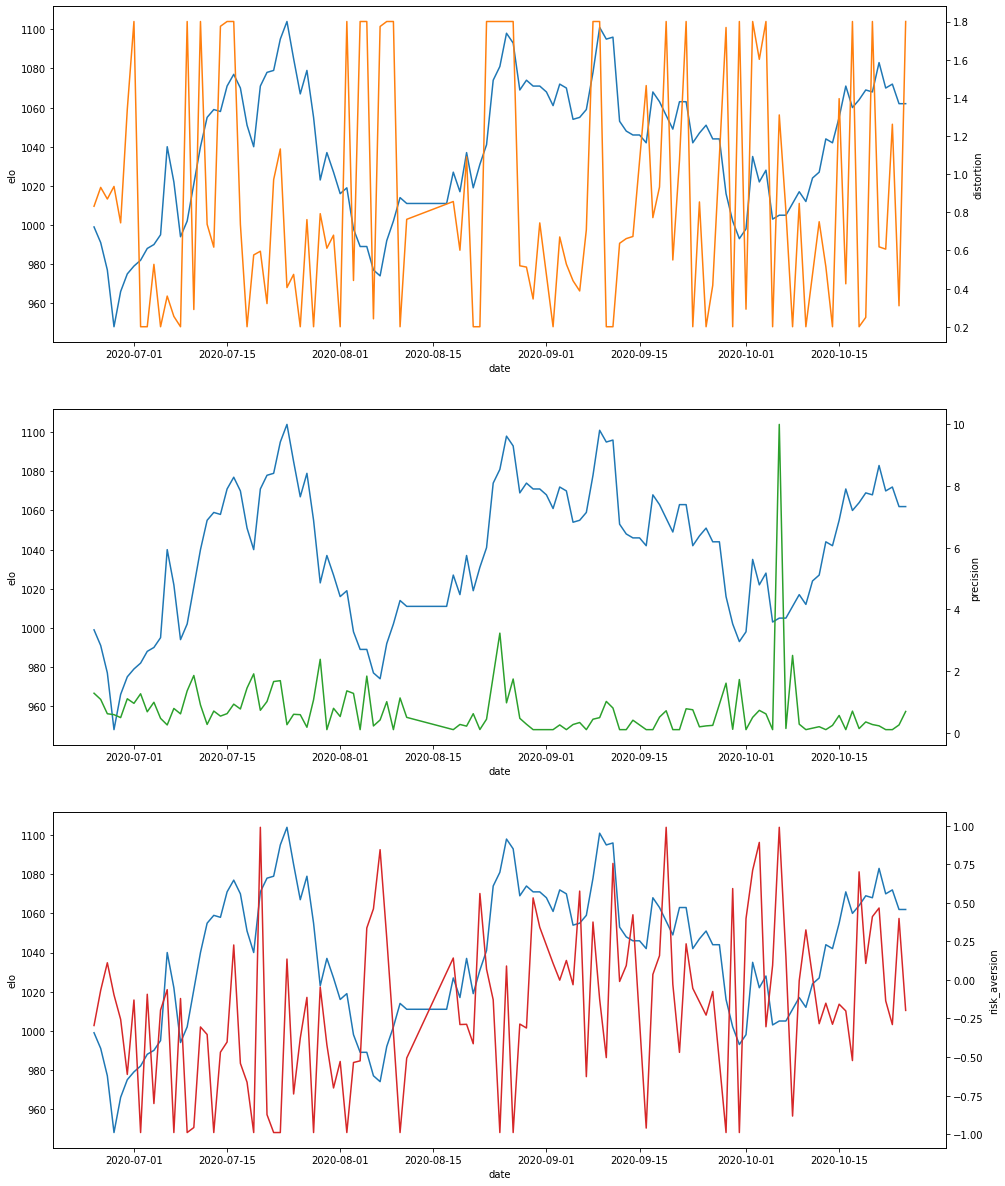

In [226]:
fig, axes = plt.subplots(figsize=(16, 7*n_param), nrows=n_param)
colors = [f"C{i}" for i in range(1, n_param+1)]
for i in range(n_param):
    
    ax = axes[i]
    param= Model.param_labels[i]
    color = colors[i]
    
    sns.lineplot(data=df_elo_m, ax=ax)
    ax.set_ylabel("elo")
    ax_tw = ax.twinx()
    sns.lineplot(x=dates, y=param, data=df_p, ax=ax_tw, color=color)

plt.show()

In [237]:
results = []
cond = ("is_gain", "is_loss")

for i_m, m in enumerate(monkeys):
    print(f"monkey {i_m+1}/{len(monkeys)}")
    r_m = {}
    for cd in cond:
        df_m = df[df.monkey == m]
        df_m = df_m[(df_m.is_risky == True) & (df_m[cd] == True)]
        nunique = df_m.apply(pd.Series.nunique)
        cols_to_drop = nunique[nunique == 1].index
        df_m.drop(cols_to_drop, axis=1, inplace=True)

        dates = df_m.date.unique()
        n_days = len(dates)
        n_param = len(Model.param_labels)

        r = np.zeros((n_days, n_param))
        for i in tqdm(range(n_days), file=sys.stdout):
            best_param, best_value = optimize(model=Model, data=df_m[df_m.date == dates[i]])
            r[i] = best_param

        r_m[cd] = pd.DataFrame(r, index=dates, columns=Model.param_labels)
    results.append(r_m)

monkey 1/15
100%|██████████| 86/86 [00:13<00:00,  6.42it/s]
monkey 2/15
100%|██████████| 103/103 [00:39<00:00,  2.62it/s]
monkey 3/15
100%|██████████| 60/60 [00:18<00:00,  3.20it/s]
monkey 4/15
100%|██████████| 113/113 [00:39<00:00,  2.84it/s]
monkey 5/15
100%|██████████| 66/66 [00:07<00:00,  8.37it/s]
monkey 6/15
100%|██████████| 111/111 [00:35<00:00,  3.17it/s]
monkey 7/15
100%|██████████| 113/113 [00:52<00:00,  2.14it/s]
monkey 8/15
100%|██████████| 106/106 [00:30<00:00,  3.47it/s]
monkey 9/15
100%|██████████| 98/98 [00:22<00:00,  4.42it/s]
monkey 10/15
100%|██████████| 73/73 [00:11<00:00,  6.40it/s]
monkey 11/15
100%|██████████| 89/89 [00:12<00:00,  7.04it/s]
monkey 12/15
100%|██████████| 80/80 [00:16<00:00,  4.71it/s]
monkey 13/15
100%|██████████| 70/70 [00:18<00:00,  3.74it/s]
monkey 14/15
100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
monkey 15/15
100%|██████████| 62/62 [00:06<00:00,  9.65it/s]


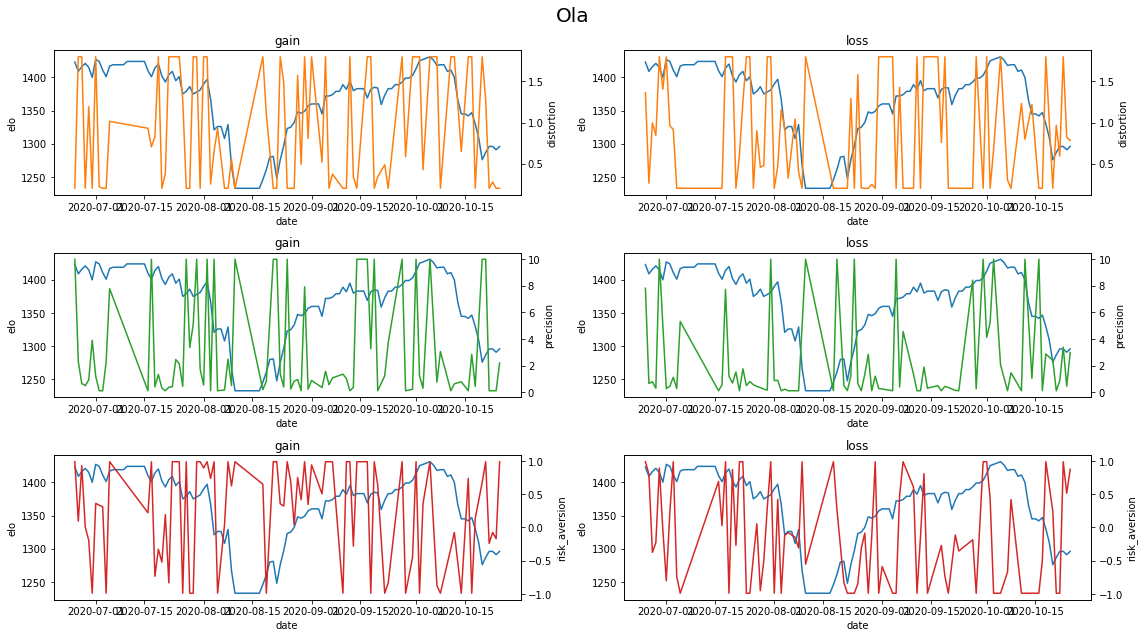

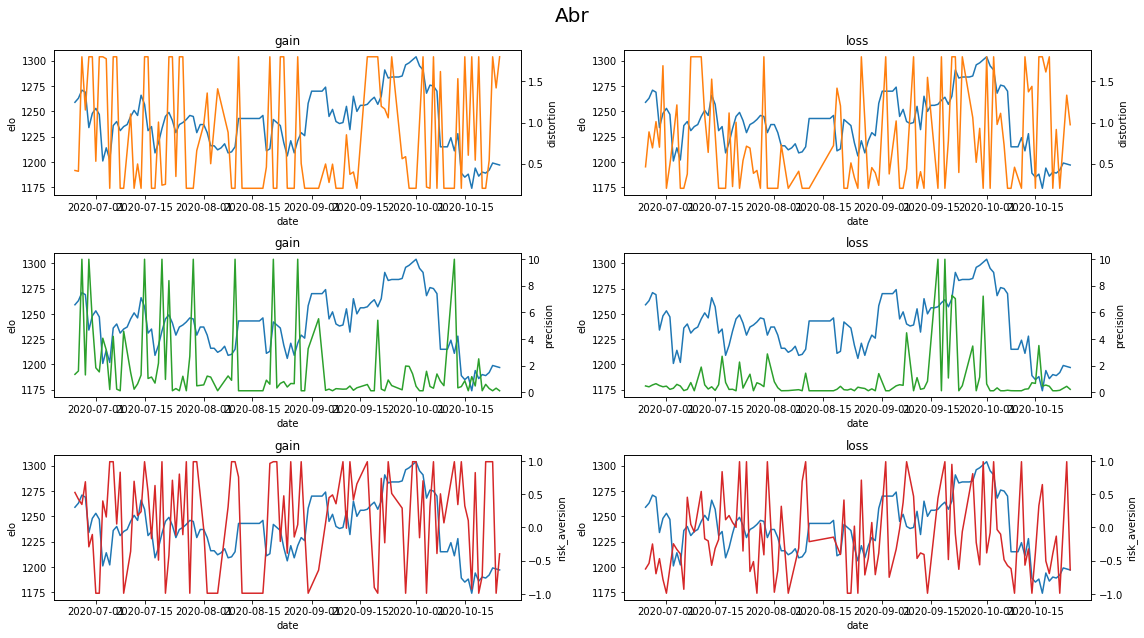

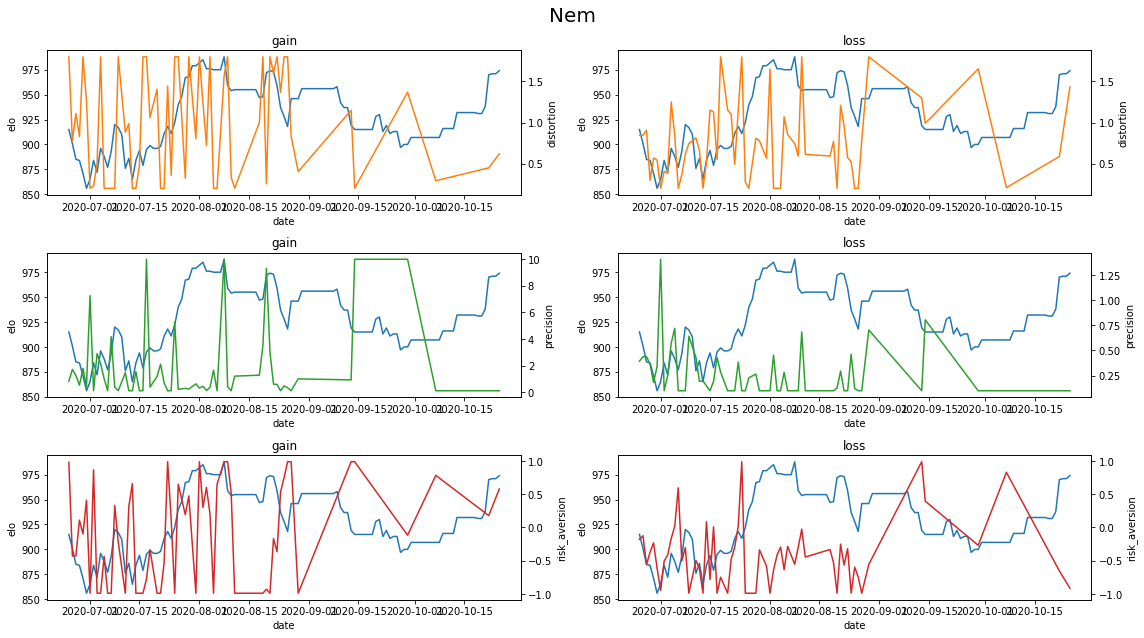

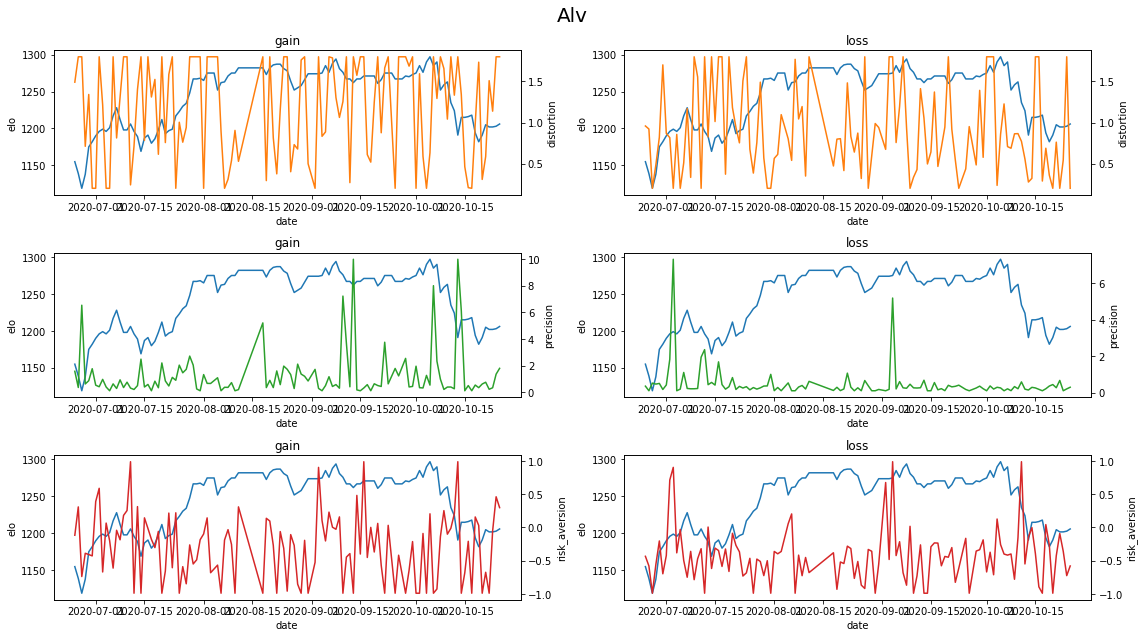

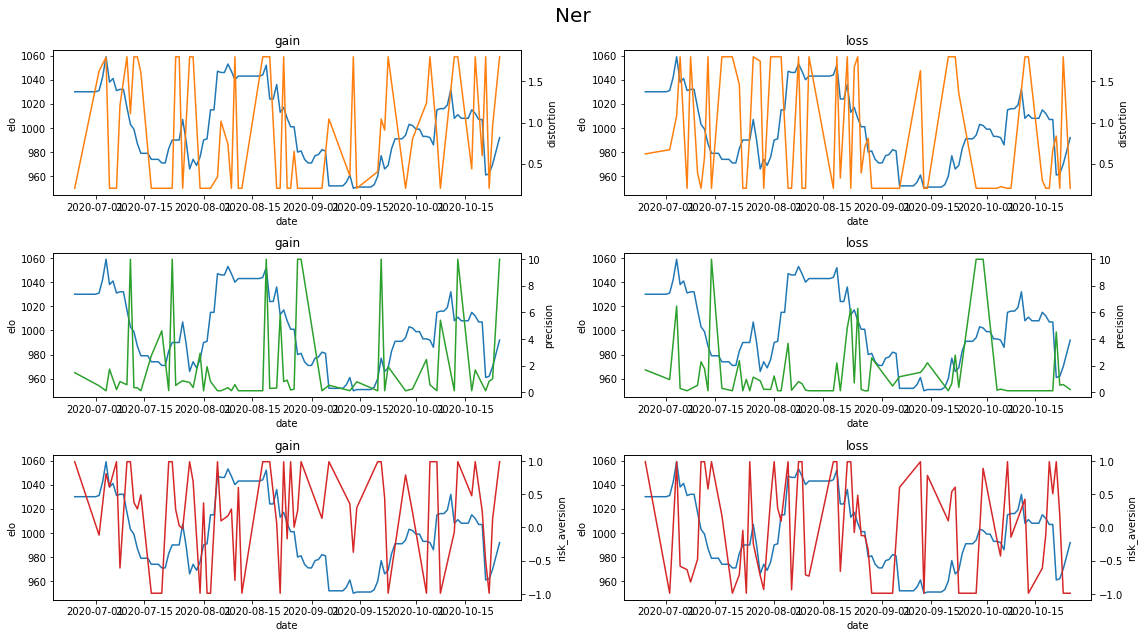

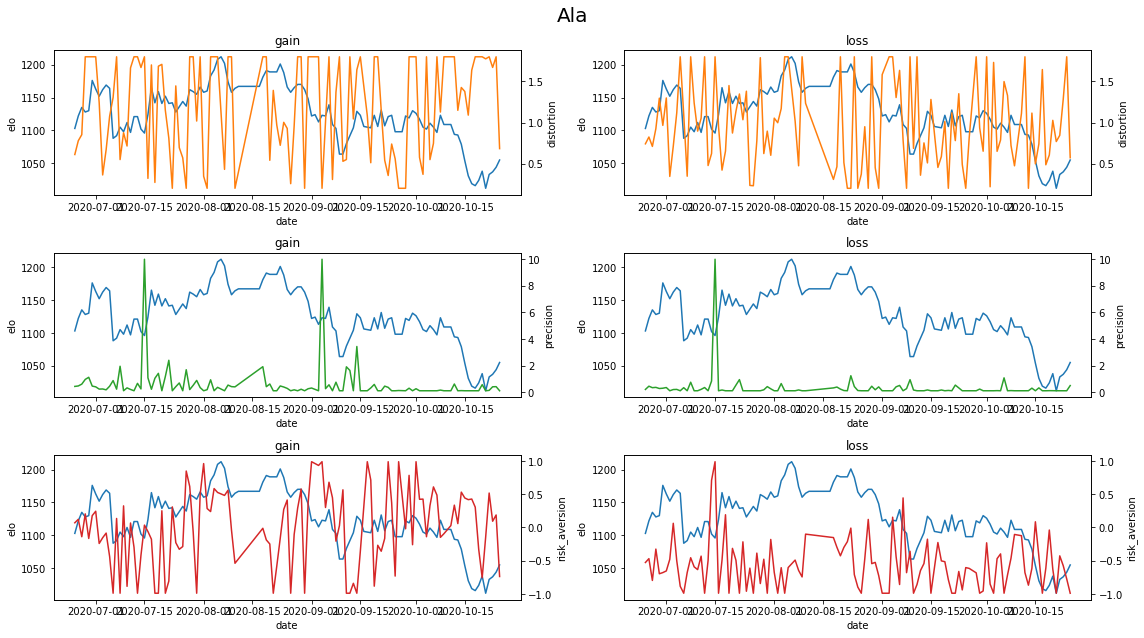

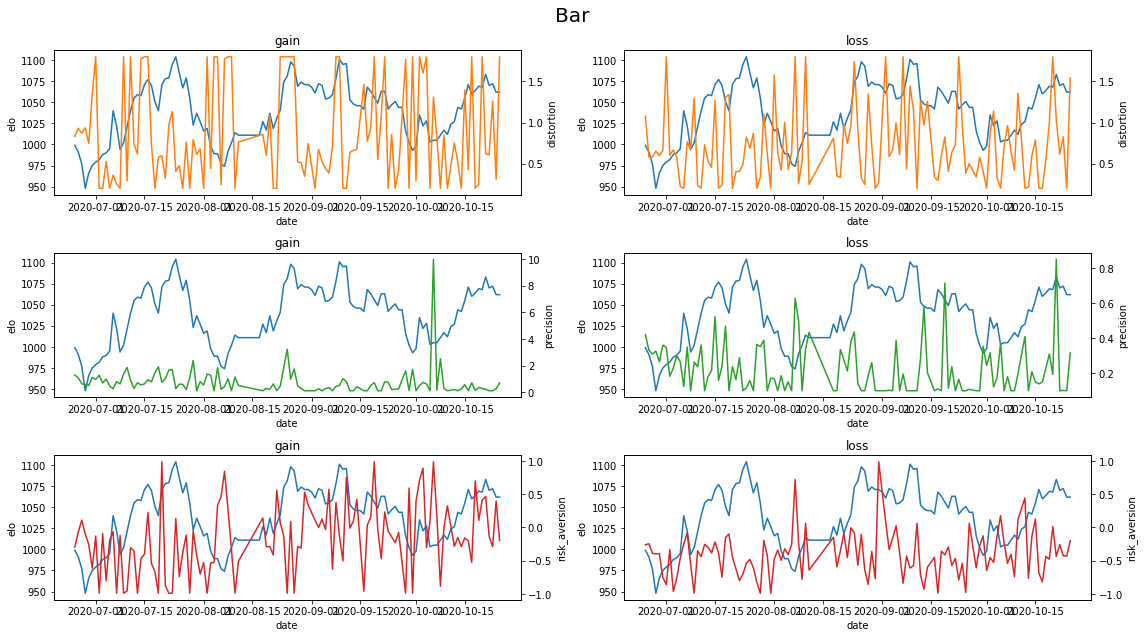

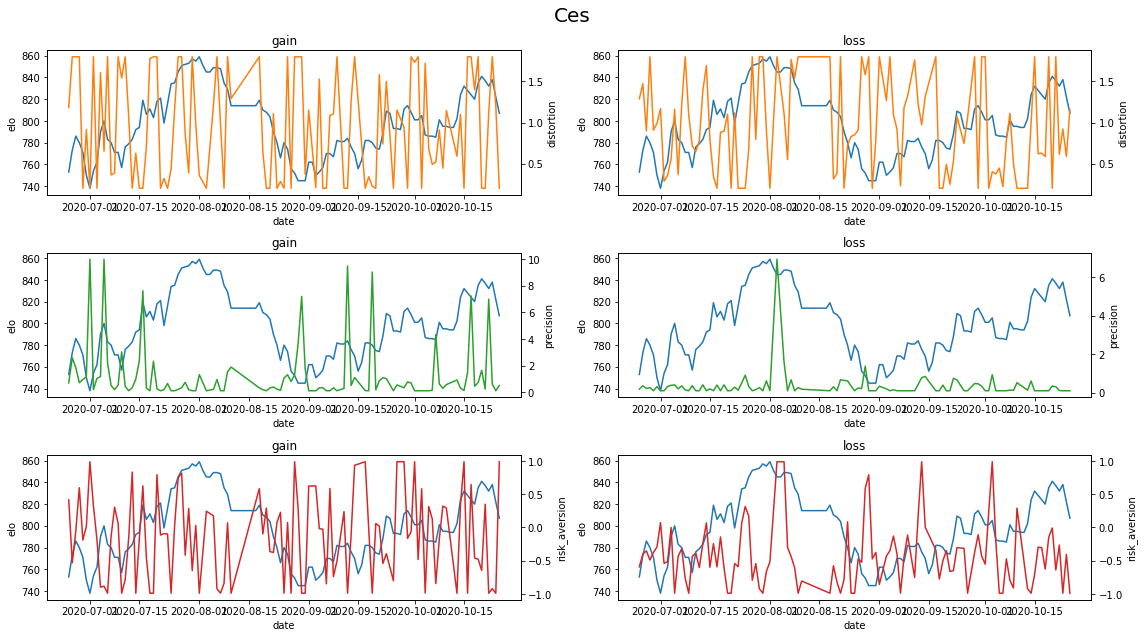

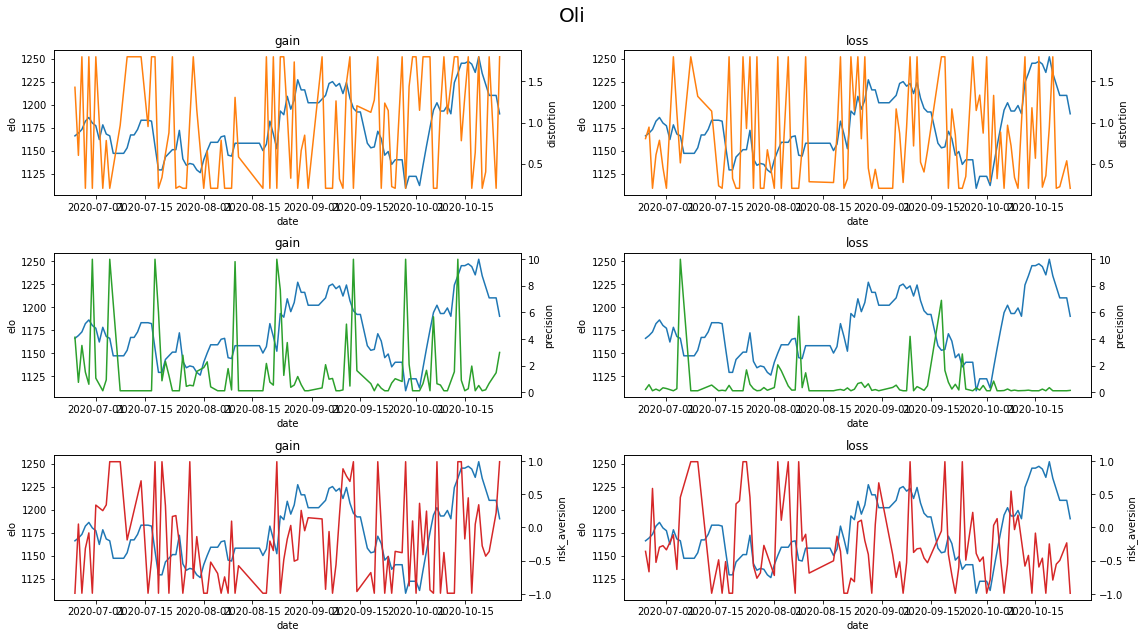

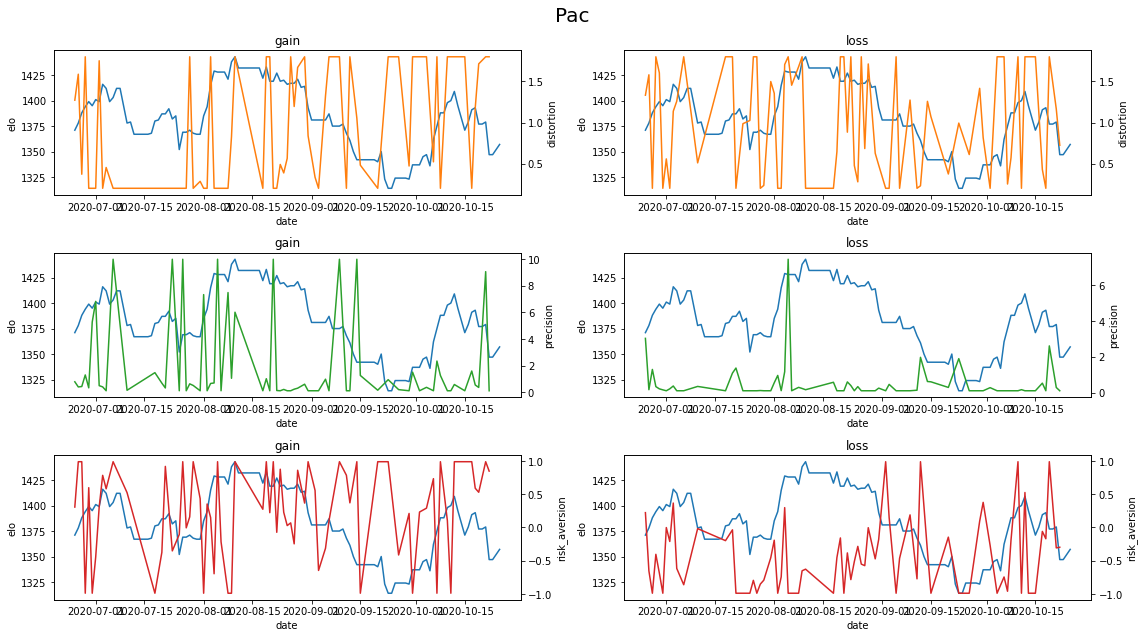

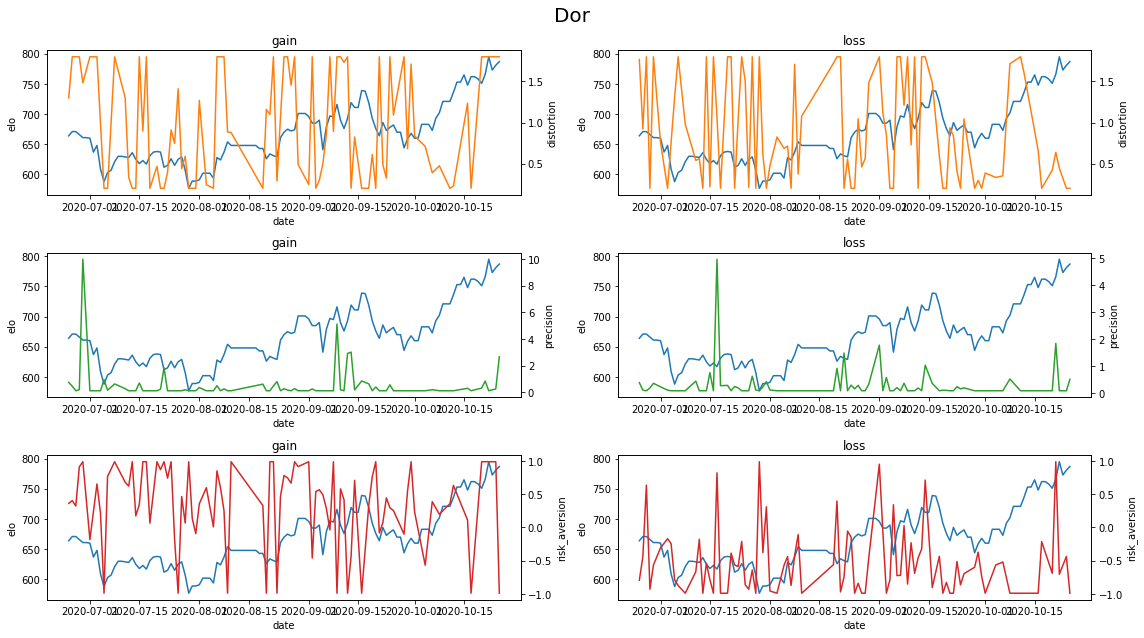

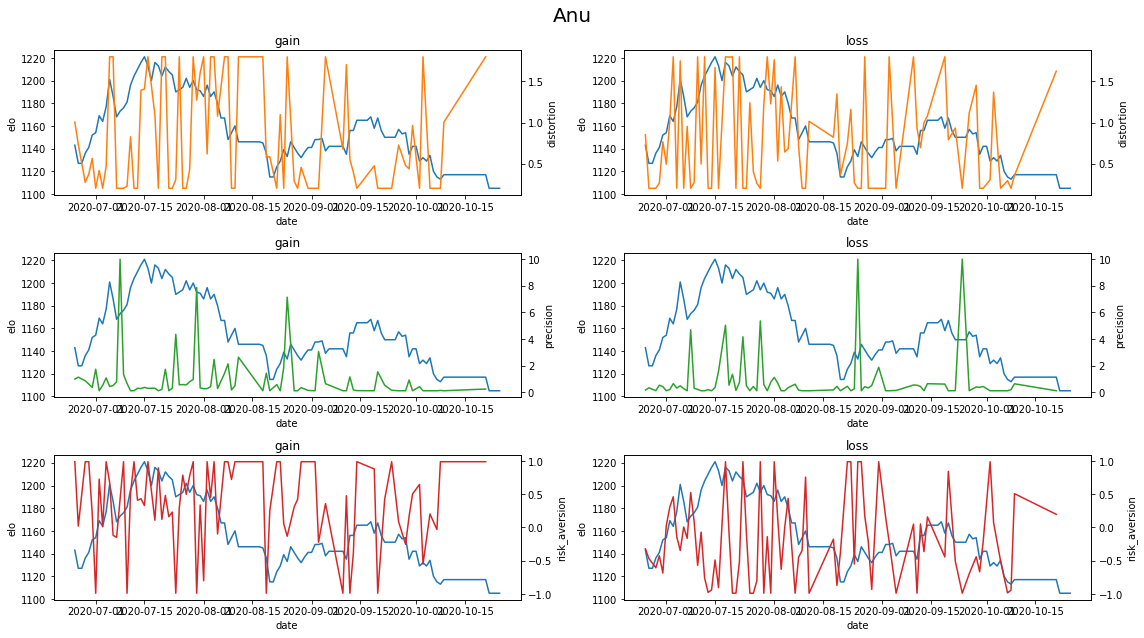

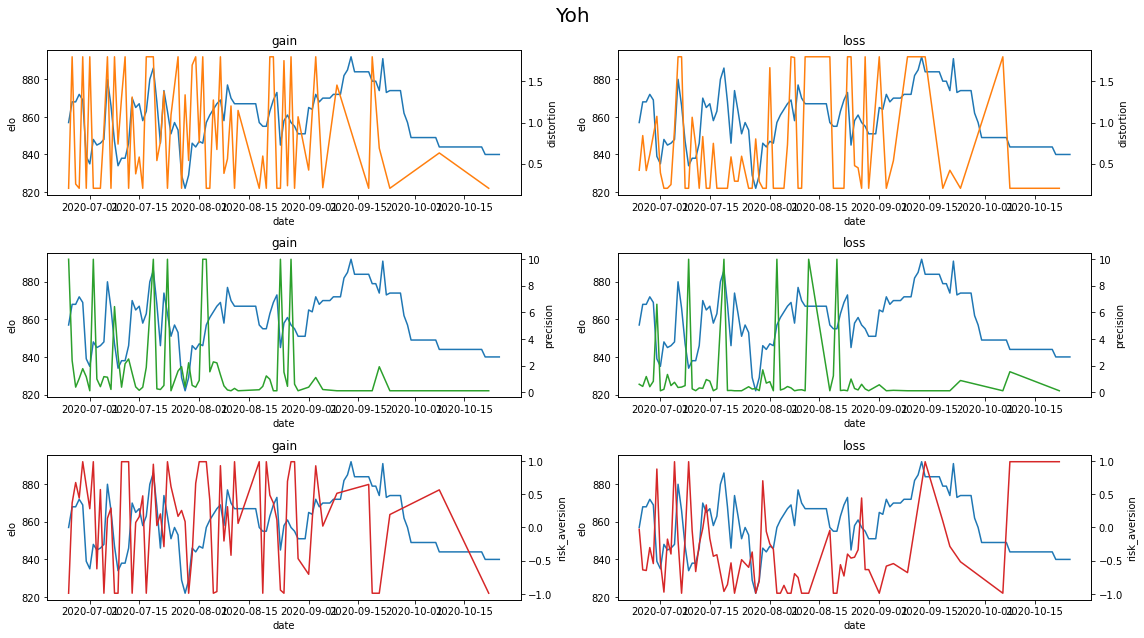

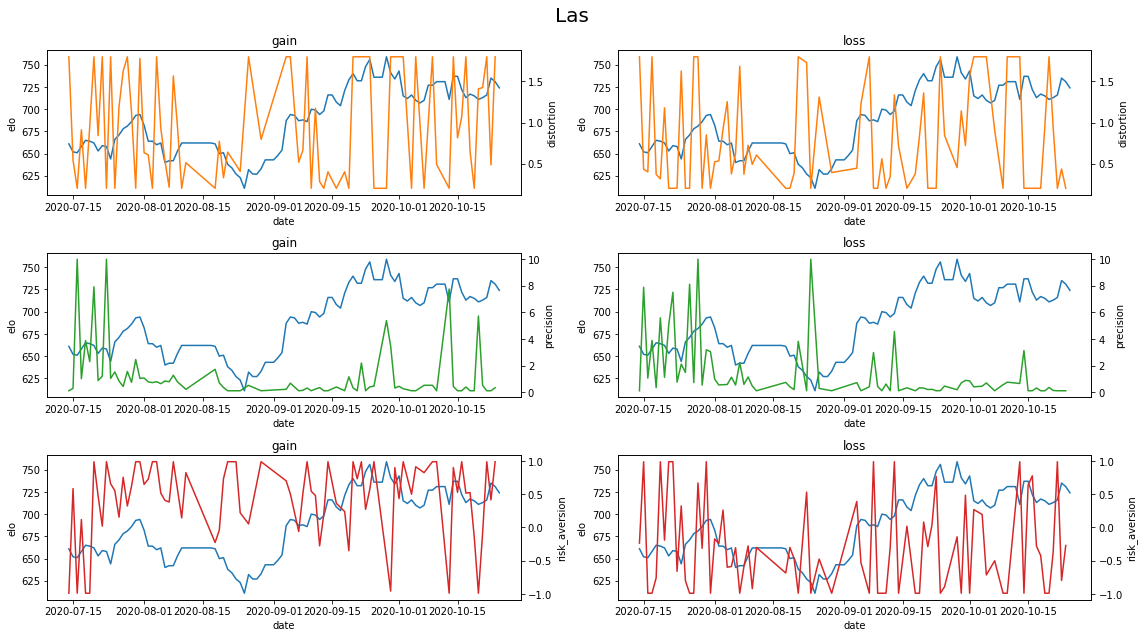

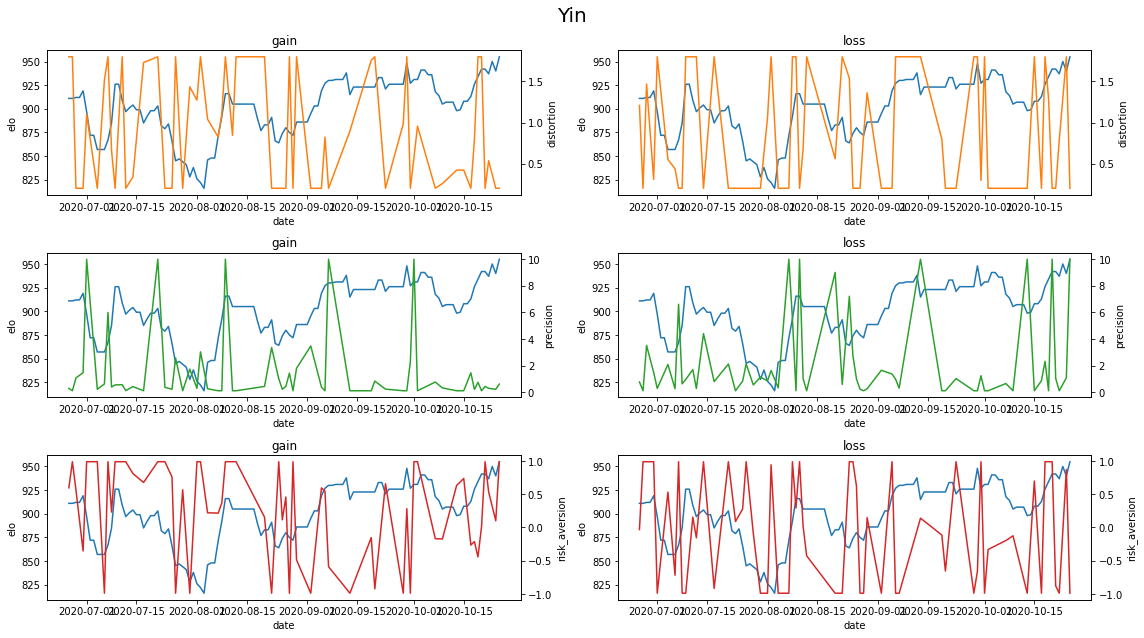

In [271]:
for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(16, 3*n_param), nrows=n_param, ncols=2)
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = results[i][cd]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.index)]
        
        for k in range(n_param):

            ax = axes[k, j]
            ax.set_title(cd.replace("is_", ""))
            param = Model.param_labels[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            ax_tw = ax.twinx()
            sns.lineplot(x=df_p.index, y=param, data=df_p, ax=ax_tw, color=color)
    plt.tight_layout()
    plt.show()

In [243]:
cd = "is_gain"
m = "Bar"
    
df_m = df[df.monkey == m]
df_m = df_m[(df_m.is_risky == True) & (df_m[cd] == True)]
nunique = df_m.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_m.drop(cols_to_drop, axis=1, inplace=True)

dates = df_m.date.unique()
n_days = len(dates)

print(n_days)

113


In [259]:
n_param = len(Model.param_labels)
w = 5

r = np.zeros((n_days, n_param))
for i in tqdm(range(n_days), file=sys.stdout):
    
    b0 = dates[max(i-(w-1), 0)]
    b1 = dates[min(i+w, n_days-1)]
    mask = (df_m.date >= b0) & (df_m.date <= b1)
    best_param, best_value = optimize(model=Model, data=df_m[mask])
    r[i] = best_param

r_m_cd = pd.DataFrame(r, index=dates, columns=Model.param_labels)

100%|██████████| 113/113 [05:40<00:00,  3.01s/it]


In [267]:
df_elo_m = df_elo[m.lower()]
df_elo_m = df_elo_m[df_elo_m.index >= min(r_m_cd.index)]

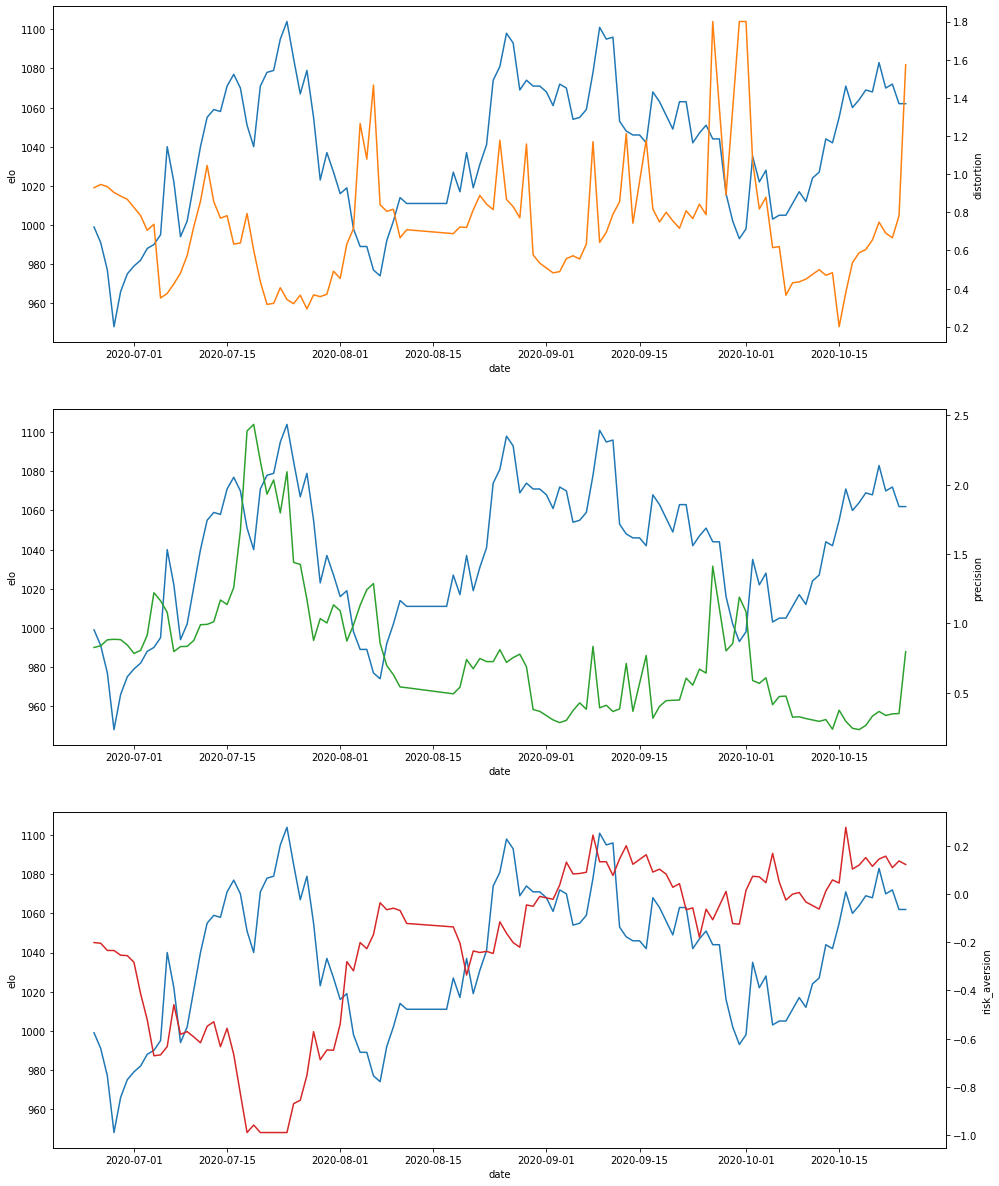

In [269]:
fig, axes = plt.subplots(figsize=(16, 7*n_param), nrows=n_param)
colors = [f"C{i}" for i in range(1, n_param+1)]
for i in range(n_param):
    
    ax = axes[i]
    param= Model.param_labels[i]
    color = colors[i]
    
    sns.lineplot(data=df_elo_m, ax=ax)
    ax.set_ylabel("elo")
    ax_tw = ax.twinx()
    sns.lineplot(x=r_m_cd.index, y=param, data=r_m_cd, ax=ax_tw, color=color)

plt.show()

In [ ]:
results = []
cond = ("is_gain", "is_loss")
w = 5

for i_m, m in enumerate(monkeys):
    print(f"monkey {i_m+1}/{len(monkeys)}")
    r_m = {}
    for cd in cond:
        
        df_m = df[df.monkey == m]
        df_m = df_m[(df_m.is_risky == True) & (df_m[cd] == True)]
        nunique = df_m.apply(pd.Series.nunique)
        cols_to_drop = nunique[nunique == 1].index
        df_m.drop(cols_to_drop, axis=1, inplace=True)

        dates = df_m.date.unique()
        n_days = len(dates)
        n_param = len(Model.param_labels)

        r = np.zeros((n_days, n_param))
        for i in tqdm(range(n_days), file=sys.stdout):
            
            b0 = dates[max(i-(w-1), 0)]
            b1 = dates[min(i+w, n_days-1)]
            mask = (df_m.date >= b0) & (df_m.date <= b1)
            best_param, best_value = optimize(model=Model, data=df_m[mask])
            r[i] = best_param

        r_m[cd] = pd.DataFrame(r, index=dates, columns=Model.param_labels)
    results.append(r_m)

monkey 1/15
  6%|▌         | 5/86 [00:09<02:38,  1.96s/it]

In [ ]:
for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(16, 3*n_param), nrows=n_param, ncols=2)
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = results[i][cd]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.index)]
        
        for k in range(n_param):

            ax = axes[k, j]
            ax.set_title(cd.replace("is_", ""))
            param = Model.param_labels[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            ax_tw = ax.twinx()
            sns.lineplot(x=df_p.index, y=param, data=df_p, ax=ax_tw, color=color)
    plt.tight_layout()
    plt.show()